In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.6MB/s 
     |████████████████████████████████| 358kB 12.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 1.0MB 14.2MB/s 
     |████████████████████████████████| 40kB 5.3MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 2.6MB 16.9MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&respo

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
pip install --upgrade pandas

     |████████████████████████████████| 10.5MB 2.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


In [19]:
key = '62c8150afa084c799907ad0083a5cb83'

In [20]:
from itertools import chain

from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth


def search_images_bing(key, term, total_count=150, min_sz=128):
    max_count = 150
    client = api("https://api.cognitive.microsoft.com", auth(key))
    imgs = [
        client.images.search(
            query=term, min_height=min_sz, min_width=min_sz, count=count, offset=offset
        ).value
        for count, offset in (
            (
                max_count if total_count - offset > max_count else total_count - offset,
                offset,
            )
            for offset in range(0, total_count, max_count)
        )
    ]
    return L(chain(*imgs))

In [21]:
results = search_images_bing(key, "limestone", 500)

In [22]:
ims = results.attrgot('content_url')
len(ims)

500

In [ ]:
rock_types = 'limestone','shale','sandstone', 'basalt', 'diorite', 'granite', 'tuff pumice', 'greenschist'
path = Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks')

In [26]:
rock_types = "Arenisca"["sandstone outcrop", "砂岩の岩の露頭", "砂岩露頭", "sandsten outcrop"], "Lutita"["shale", "shale outcrop", "black shale", "lutita", "red shale", "roche schisteuse",  "頁岩露頭", "셰일 노두"]
path = Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks_all')

TypeError: ignored

In [ ]:
if not path.exists():
    path.mkdir()
    for o in rock_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} rock')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#1164) [Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000004.JPG'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000001.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000006.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000000.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000009.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000002.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000014.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000005.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000013.jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/limestone/00000010.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
rocks = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = rocks.dataloaders(path)

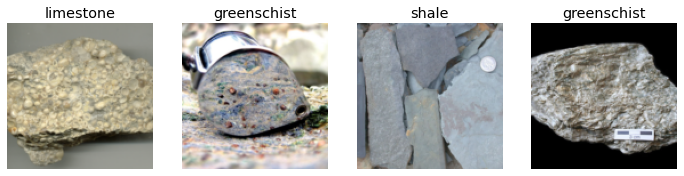

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

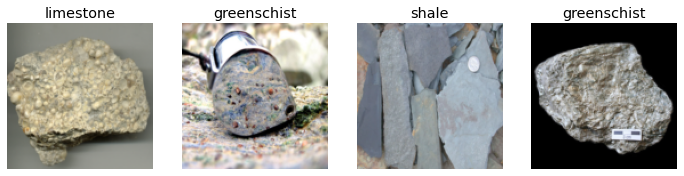

In [ ]:
rocks = rocks.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = rocks.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

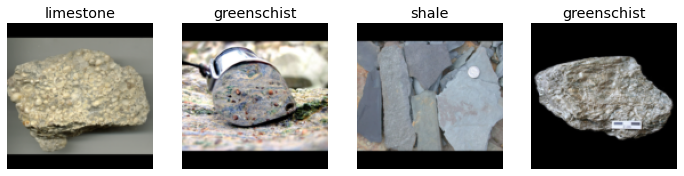

In [ ]:
rocks = rocks.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = rocks.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

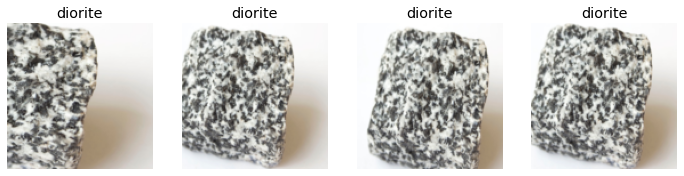

In [ ]:
rocks = rocks.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = rocks.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

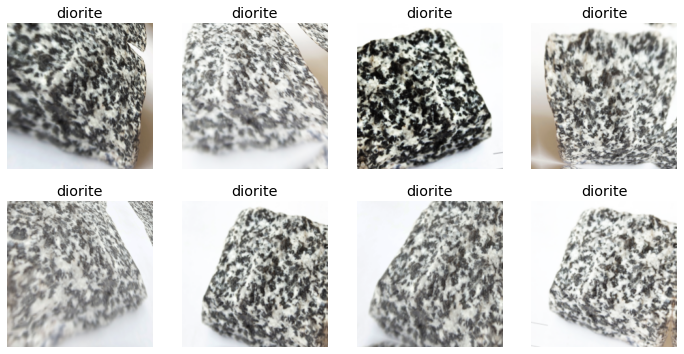

In [ ]:
rocks = rocks.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),batch_tfms=aug_transforms(mult=2))
dls = rocks.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
rocks = rocks.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = rocks.dataloaders(path)

In [ ]:
doc(cnn_learner)

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(15)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate, lr=0.0001)
learn.fine_tune(150)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


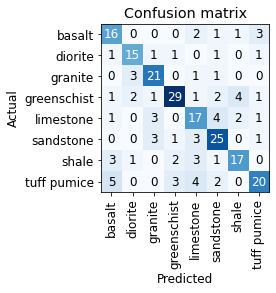

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

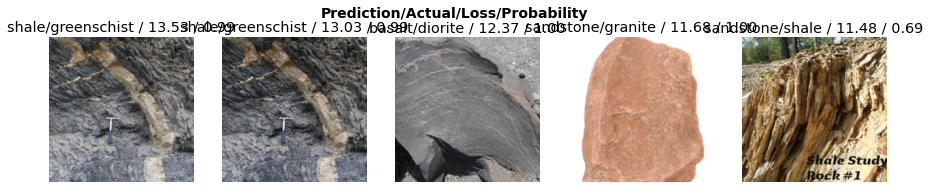

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.save("/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/modelos")

Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/modelos.pth')

In [ ]:
learn.export('export.pkl')

In [ ]:
doc(path)

In [4]:
path = Path("/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/modelos")
path.ls(file_exts='.pkl')

(#1) [Path('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/rocks/modelos/export.pkl')]

In [5]:
learn_inf = load_learner(path/'export.pkl')

In [6]:
learn_inf.predict('/content/gdrive/My Drive/Colab Notebooks/Fast AI/images/sandstone1.jpg')

('sandstone',
 tensor(5),
 tensor([1.7643e-08, 3.5712e-07, 2.0399e-08, 2.4890e-07, 1.6811e-05, 9.9998e-01, 5.6164e-06, 3.8745e-07]))

In [7]:
learn_inf.dls.vocab

(#8) ['basalt','diorite','granite','greenschist','limestone','sandstone','shale','tuff pumice']

In [8]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

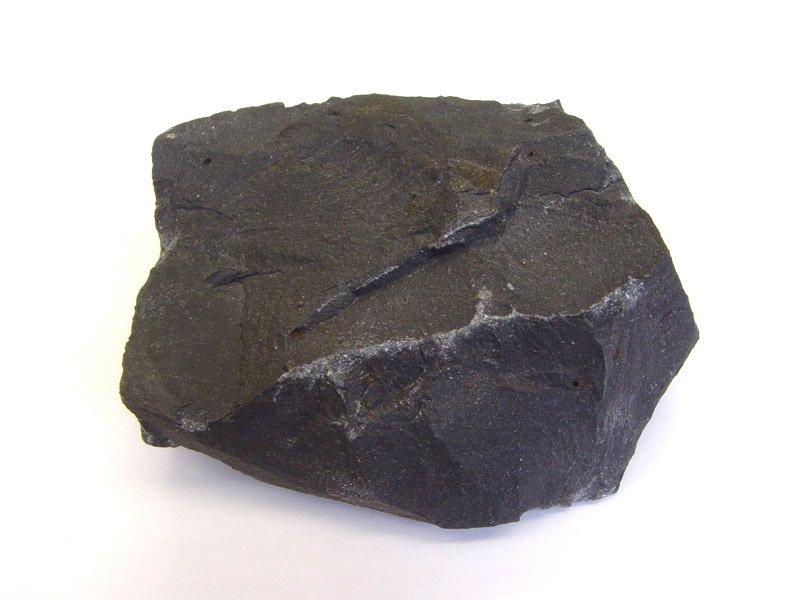

In [10]:
img=PILImage.create(btn_upload.data[-1])
img

In [11]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [12]:
with out_pl: display(img.to_thumb(128,128))

In [13]:
pred,pred_idx,probs = learn_inf.predict(img)

In [14]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: basalt; Probability: 0.9992')

In [15]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [16]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [17]:
btn_upload = widgets.FileUpload()

In [18]:
VBox([widgets.Label('Select your rock!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 5.9MB 8.4MB/s 
     |████████████████████████████████| 184kB 56.6MB/s 
     |████████████████████████████████| 921kB 55.6MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
